In [1]:
import ssl
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context
pd.set_option('display.max_rows', 25)
warnings.simplefilter("ignore")

# 3.3.3

In [3]:
# Предыстория: Мы взяли наш соревновательный датасет, достали из него топ-5 важных признаков,
# а ещё добавили столько же случайных, анонимизировали и получили 10 столбцов/фичей.
# Попробуйте составить свой рейтинг признаков по важности.
# Будем проверять только первые 5, но в ответе можно указать все 10 значений с номерами (feature_0 соответствует 0).

# Пример ответа: answer_list = [5, 1, 9, 2, 8] .
# Ответ засчитывается, если в списке оказались все верные признаки. Порядок фичей важен!

In [75]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779915/fs_task1_10f.csv')

In [76]:
df = df[['target'] + [col for col in df.columns if col != 'target']]

In [77]:
def add_random_feature(data):
    np.random.seed(42)
    size = data.shape[0]
    # Целочисленный признак
    data['random_int'] = np.random.randint(-20, 200, size)
    # Признак типа float с равномерным распределением
    data['random_num'] = np.random.random(size=size)
    # Признак с нормальным распределением
    data['random_norm'] = np.random.normal(loc=4, scale=1.5, size=size)
    # Категориальный признак str формата с дисбалансом
    data['random_cat'] = np.random.choice(['A', 'B', 'C', 'D'], p=[0.20, 0.3, 0.45, 0.05], size=size)
    # Численный категориальный признак
    data['random_ord'] = np.random.choice([1, 10, 100, 1000], p=[0.40, 0.3, 0.2, 0.1], size=size)

    return data

In [78]:
df = add_random_feature(df).copy()

In [79]:
df

,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,random_int,random_num,random_norm,random_cat,random_ord
0,engine_ignition,2015,163.000000,-1.450726,0.5,332,-0.018070,170,-9,0.10,50.339080,82,0.800770,3.725648,A,1
1,break_bug,2014,108.451384,2.233679,0.4,425,-0.849765,173,16,0.10,44.367816,159,0.629778,1.052349,C,100
2,engine_check,2010,167.738026,-8.024895,-0.8,50,0.134024,171,-9,0.10,44.902299,72,0.216324,0.347404,C,1
3,engine_check,2018,167.000000,-0.201363,2.0,224,-0.985060,173,-2,0.52,44.770115,-6,0.518260,4.216140,C,1
4,another_bug,2019,183.000000,14.666233,0.8,351,0.606498,170,13,0.10,45.241379,86,0.597274,3.401272,D,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,gear_stick,2014,114.849701,-8.475321,-0.3,339,-1.062402,170,9,0.10,44.419540,197,0.118874,2.086306,A,10
1866,engine_check,2011,152.198802,10.065974,0.2,241,-0.365611,174,-1,0.10,43.488506,148,0.764719,3.892912,C,100
1867,wheel_shake,2014,118.000000,9.569632,0.5,450,0.290211,171,-3,0.10,44.477011,-18,0.671055,5.086895,B,10
1868,electro_bug,2012,188.521004,14.327537,-0.7,392,1.218379,174,1,0.00,48.706897,99,0.435324,4.772582,C,1000


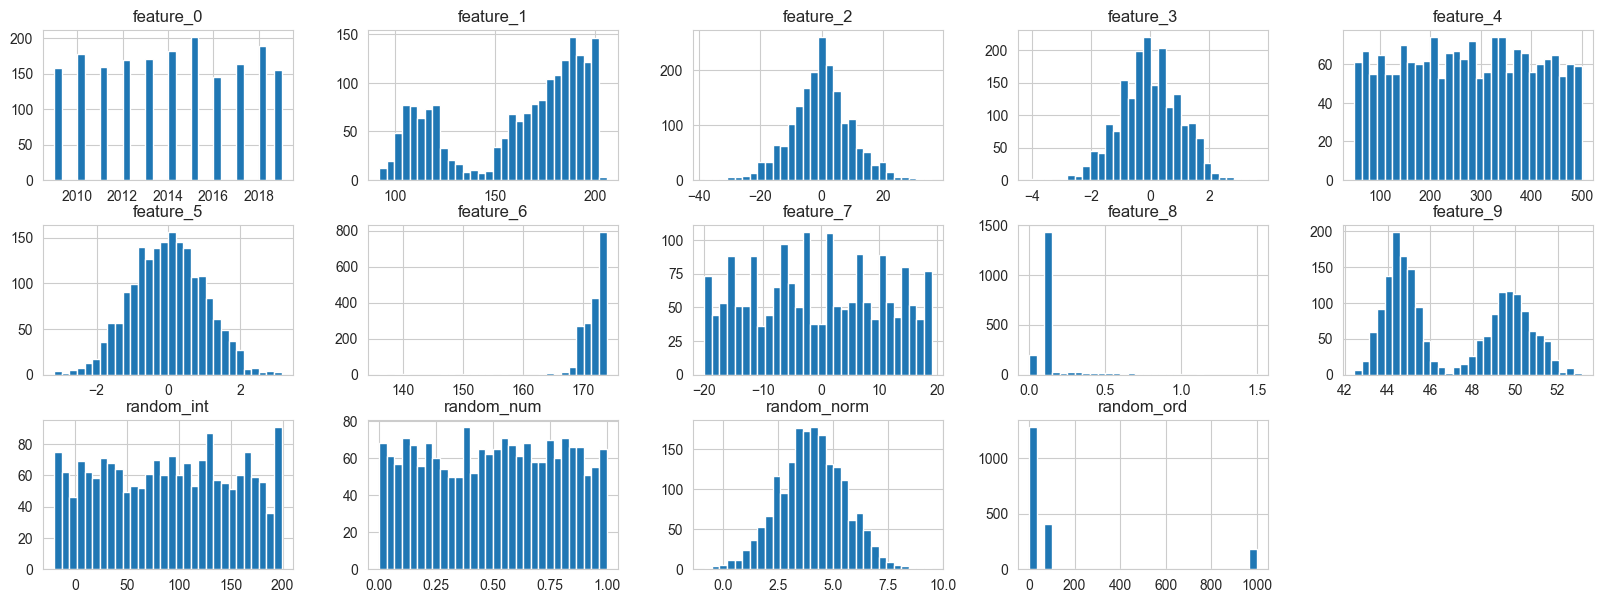

In [80]:
df.hist(figsize=(20, 7), layout=(-1, 5), bins=30);

In [142]:
feature = [col for col in df.columns if col != 'target']
results = pd.DataFrame(index=feature)

In [144]:
results

""
feature_0
feature_1
feature_2
feature_3
feature_4
feature_5
feature_6
feature_7
feature_8
feature_9


# Линейная корреляция

# Phik корреляция

In [81]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'random_int', 'random_num', 'random_norm', 'random_ord']


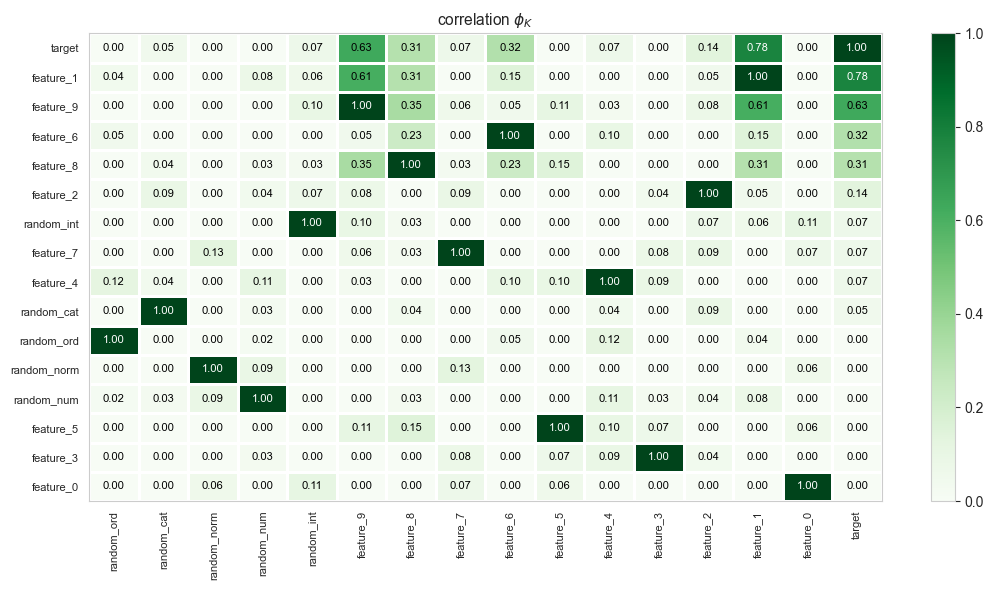

In [82]:
phik_overview = df.phik_matrix().round(2).sort_values('target')

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.8, figsize=(11, 6))

In [160]:
tmp = phik_overview[phik_overview.index.isin(feature)]['target'].sort_index()
tmp.name = 'phik'
results = results.merge(tmp, how='left', left_index=True, right_index=True)

interval columns not set, guessing: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'random_int', 'random_num', 'random_norm', 'random_ord']


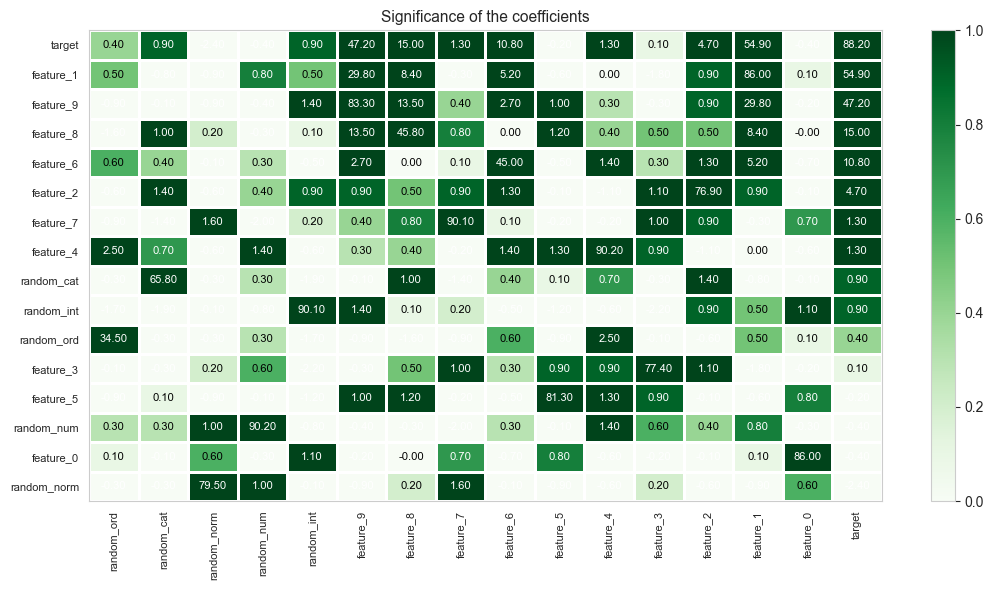

In [163]:
significance_overview = df.significance_matrix().fillna(0).round(1).sort_values('target')

plot_correlation_matrix(significance_overview.values,
                        x_labels=significance_overview.columns,
                        y_labels=significance_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title="Significance of the coefficients",
                        usetex=False, fontsize_factor=0.8, figsize=(11, 6))

In [ ]:
# Если логарифмическая вероятность вашего результата больше 6.63, вероятность того, что результат, произойдет случайно, составляет менее 1%.
# Таким образом, мы можем быть на 99% уверены, что результат действительно что-то значит. В терминах p-value обычно это выражается как p < 0.01.
# Если логарифмическая вероятность составляет 3.84 или более, вероятность того, что это произойдет случайно, составляет менее 5%.
# Так что мы на 95% уверены в результате. В терминах p-value это выражается как p < 0.05.

In [164]:
tmp = significance_overview[significance_overview.index.isin(feature)]['target'].sort_index()
tmp.name = 'phik_signif'
results = results.merge(tmp, how='left', left_index=True, right_index=True)

# Feature Importance

In [113]:
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split

In [118]:
drop_cols = ['target']
cat_cols = ['random_cat']

X = df.drop(drop_cols, axis=1, errors='ignore')
y = df['target']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
model = CatBoostClassifier(random_state=42,
                           cat_features=cat_cols,
                           thread_count=-1)
model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=100, plot=False,
          early_stopping_rounds=100)

Learning rate set to 0.10885
0:	learn: 1.9022573	test: 1.9027303	best: 1.9027303 (0)	total: 68ms	remaining: 1m 7s
100:	learn: 0.4833473	test: 0.6543862	best: 0.6543862 (100)	total: 1.41s	remaining: 12.5s
200:	learn: 0.3320090	test: 0.6168152	best: 0.6155341 (191)	total: 2.54s	remaining: 10.1s
300:	learn: 0.2496300	test: 0.6227710	best: 0.6136038 (245)	total: 4.27s	remaining: 9.92s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6136038375
bestIteration = 245

Shrink model to first 246 iterations.


In [171]:
# посмотрим на важность признаков катбуста
fi = model.get_feature_importance(prettified=True)
fi.columns = ['feature', 'catbost_fi']
fi.set_index('feature', inplace=True)
results = results.merge(fi, how='left', left_index=True, right_index=True)

# Permutation importance

In [179]:
import matplotlib.pyplot as plt

In [183]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=100, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

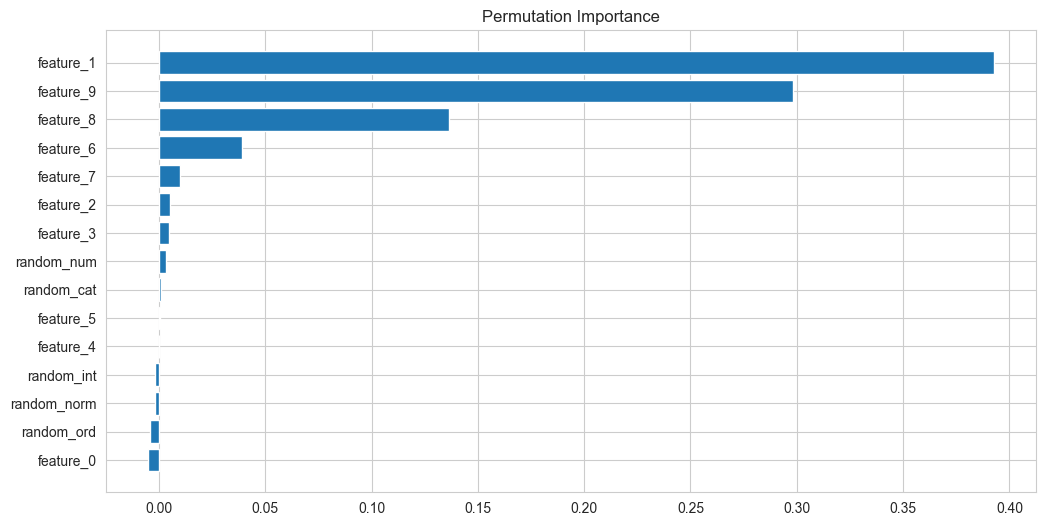

In [184]:
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Permutation Importance');

In [197]:
tmp = pd.DataFrame(index=np.array(X.columns)[sorted_idx],
                   data={'permutation': perm_importance.importances_mean[sorted_idx]})

In [198]:
tmp

,permutation
feature_0,-0.004893
random_ord,-0.004385
random_norm,-0.002032
random_int,-0.001604
feature_4,0.000187
feature_5,0.000348
random_cat,0.000856
random_num,0.003529
feature_3,0.004519
feature_2,0.005241


In [199]:
results = results.merge(tmp, how='left', left_index=True, right_index=True)

# Shap values

In [205]:
# import shap

# CatBoost Feature Selection (рекурсивные методы)

In [212]:
summary = model.select_features(X_train, y_train,
                                eval_set=(X_test, y_test),
                                features_for_select='0-14',
                                num_features_to_select=8,
                                steps=1,
                                train_final_model=False,
                                logging_level='Silent')

In [213]:
# Посмотрим на список отобранных фичей (не отранжирован по важности)
print(summary['selected_features_names'])

['feature_0', 'feature_1', 'feature_2', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'random_cat']


In [214]:
# И на лучшее значение лосса
print(f"Best loss: {summary['loss_graph']['loss_values'][-1]}")

Best loss: 0.5755166783986251


In [215]:
# В summary сохраняется полный отчет работы алгоритма
summary

{'selected_features': [0, 1, 2, 6, 7, 8, 9, 13],
 'eliminated_features_names': ['feature_4',
  'random_ord',
  'random_int',
  'feature_5',
  'feature_3',
  'random_norm',
  'random_num'],
 'loss_graph': {'main_indices': [0],
  'removed_features_count': [0, 1, 2, 3, 4, 5, 6, 7],
  'loss_values': [0.6122543559426858,
   0.6031278401556931,
   0.5958633748574395,
   0.5891222982224847,
   0.5838292502348122,
   0.5798573782285636,
   0.5763576013613275,
   0.5755166783986251]},
 'eliminated_features': [4, 14, 10, 5, 3, 12, 11],
 'selected_features_names': ['feature_0',
  'feature_1',
  'feature_2',
  'feature_6',
  'feature_7',
  'feature_8',
  'feature_9',
  'random_cat']}

In [218]:
results

,phik,phik_signif,catbost_fi,permutation
feature_0,0.00,-0.4,1.538095,-0.004893
feature_1,0.78,54.9,33.109475,0.392727
feature_2,0.14,4.7,2.799615,0.005241
feature_3,0.00,0.1,1.957318,0.004519
feature_4,0.07,1.3,1.560578,0.000187
feature_5,0.00,-0.2,2.171556,0.000348
feature_6,0.32,10.8,3.745908,0.038904
feature_7,0.07,1.3,2.174286,0.009813
feature_8,0.31,15.0,11.563241,0.136604
feature_9,0.63,47.2,29.199570,0.298449


# 3.3.6

In [219]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779915/fs_task2_22f.csv')

In [220]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target_reg,target_class
0,0,4.101552,173,1,3.405865,88182,157.168032,1.973071e+07,0,1,...,2015,191.996603,2020,0.10,0,174,9,4.76,57.15,engine_ignition
1,0,4.303506,173,1,-2.218952,86897,121.805143,1.594185e+07,0,0,...,2015,193.547718,2015,0.10,1,174,7,4.26,60.82,engine_ignition
2,0,4.246379,174,1,-3.740321,44604,175.889164,2.127630e+07,0,0,...,2013,177.922027,2019,0.10,1,174,6,5.98,46.51,engine_ignition
3,0,4.342874,172,1,3.139031,114610,151.653445,2.250440e+07,0,0,...,2017,110.165268,2016,0.70,1,174,20,4.42,30.71,gear_stick
4,1,4.140287,148,0,-4.022916,114851,159.547387,1.163474e+07,0,0,...,2017,190.915943,2020,0.10,0,174,25,4.28,59.18,engine_fuel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,0,5.345345,173,1,-1.504180,42550,176.567014,1.208544e+07,0,0,...,2013,109.836630,2018,0.10,1,174,8,1.92,31.75,break_bug
1866,0,4.042874,172,1,-1.079727,65913,128.338875,1.672780e+07,0,1,...,2014,196.975349,2016,0.10,0,174,16,3.84,50.87,engine_overheat
1867,0,3.977816,174,1,-3.001480,62873,124.795590,1.823968e+07,0,1,...,2014,179.247675,2016,0.10,0,174,14,4.04,54.30,engine_ignition
1868,0,4.540920,172,1,1.771542,80826,131.572570,1.167350e+07,0,0,...,2015,142.000000,2019,0.10,1,174,5,2.22,56.62,engine_check


interval columns not set, guessing: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'target_reg']


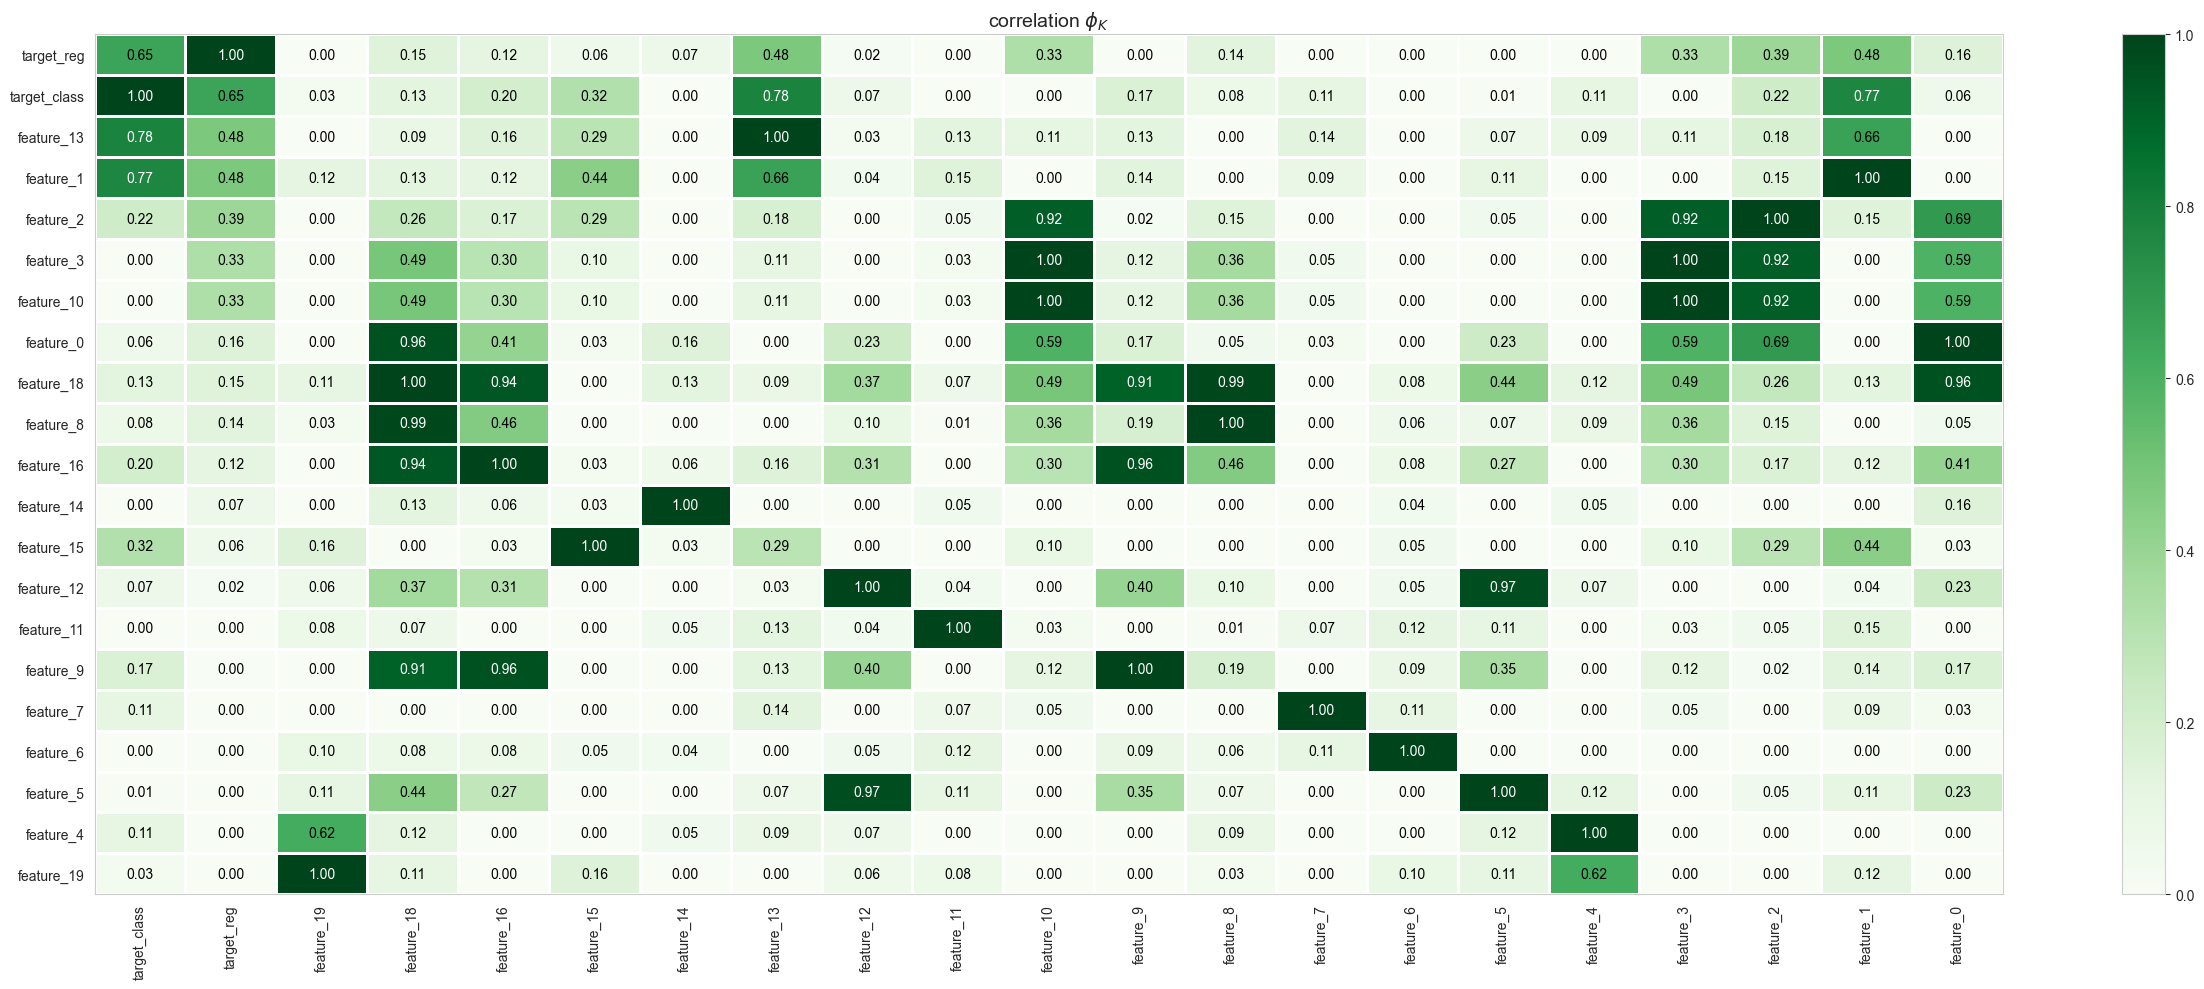

In [238]:
phik_reg = df.phik_matrix().round(2).sort_values('target_reg')

plot_correlation_matrix(phik_reg.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1, figsize=(25, 10))

In [244]:
feature_zero_to_reg = phik_reg[phik_reg['target_reg']==0.0].index.tolist()

interval columns not set, guessing: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'target_reg']


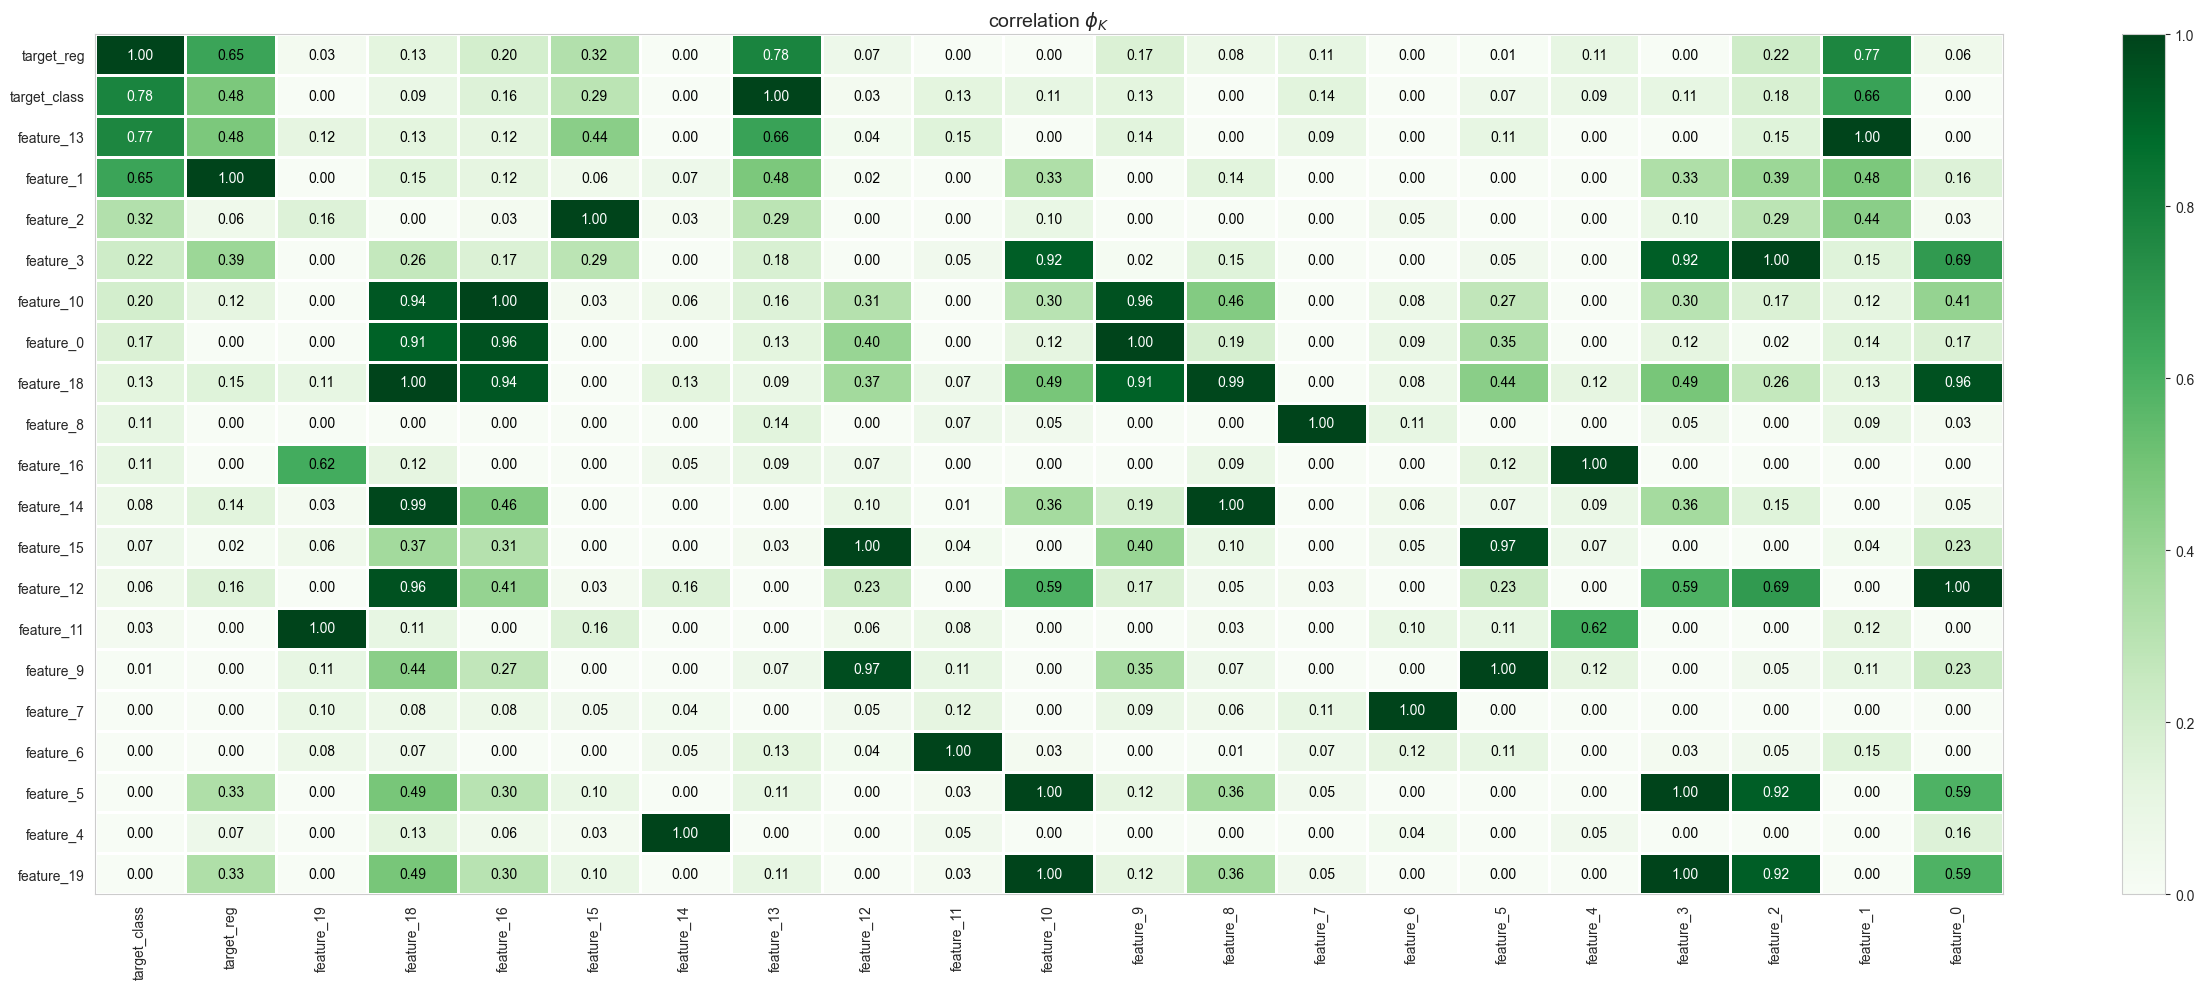

In [245]:
phik_class = df.phik_matrix().round(2).sort_values('target_class')

plot_correlation_matrix(phik_class.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1, figsize=(25, 10))

In [246]:
feature_zero_to_class = phik_class[phik_class['target_class']==0.0].index.tolist()

In [247]:
feature_zero_to_reg

['feature_19',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_9',
 'feature_11']

In [248]:
feature_zero_to_class

['feature_10', 'feature_14', 'feature_3', 'feature_11', 'feature_6']

# 3.3.8

In [6]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779915/fs_task3_310f.csv')

In [4]:
train = df.drop('target', axis=1, inplace=True)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,target
0,-0.917,-0.313,-0.69,0.771,0.086,44800,1.38,42902,-0.40,0.51,...,49118,43122,-0.99,-0.68,-0.07,8006,-0.166,0.40,173,gear_stick
1,1.406,0.324,0.88,0.104,1.275,2097,-0.53,19640,0.25,1.12,...,23477,26027,0.20,0.24,-0.13,9512,0.816,1.28,173,wheel_shake
2,0.908,0.652,0.62,0.482,0.768,21520,0.88,7491,1.07,0.58,...,19738,5099,1.53,0.18,0.69,35420,0.994,0.16,170,break_bug
3,-0.527,-0.892,-0.12,-0.764,-0.811,7649,0.61,12421,-1.78,0.21,...,27290,17042,-1.84,-0.76,-0.10,36626,0.867,-2.71,170,another_bug
4,0.050,0.646,-2.51,0.510,-0.755,27745,0.00,38967,1.08,1.46,...,43419,6234,-0.97,-0.62,0.91,35750,0.076,-0.07,173,electro_bug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,-0.960,-0.699,-0.04,0.238,-1.751,13201,0.91,39896,0.33,-1.05,...,37689,13329,-0.57,0.19,-0.54,16087,-0.487,-0.35,172,gear_stick
1632,0.088,-0.612,1.30,0.716,-0.039,46709,-0.35,17423,0.78,-1.61,...,18623,28892,0.65,-0.60,-0.96,38816,-1.602,-2.95,171,gear_stick
1633,-0.577,-1.050,-1.05,0.160,1.644,26344,-0.17,47545,0.35,0.51,...,23284,22642,-1.22,-1.03,0.82,27475,-0.302,1.88,170,another_bug
1634,1.074,-1.027,-0.53,-0.519,-1.341,42592,0.16,27582,0.15,0.65,...,23016,42662,-1.15,0.24,0.84,19920,0.323,-0.05,174,electro_bug


In [17]:
train